<img src='https://upload.wikimedia.org/wikipedia/en/thumb/3/3f/ATP_Tour_logo.svg/1200px-ATP_Tour_logo.svg.png' >

-------------------------------------------------------------------------------------------------------------------

# *This is my analysis on Mens Tennis Data , thats ranges from 2000 - 2024*

#### What i am trying to find out through my analysis ?
1. Best performing players
2. Player perfromance playing on different surfaces
3. Grand slam trends
4. Players that have the highest win % across all matches
5. No. of matches played per surface

-------------------------------------------------------------------------------------------------------------------

### Load the dataset into a pandas dataframe and explore the data

In [1]:
# import all relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# path to the data file

path_to_file = '/Users/mitch/imdb_data/atp_tennis.csv'

In [3]:
# read the file into a dataframe called tennis_data

tennis_data = pd.read_csv(path_to_file)

In [4]:
# get shape of data (how many rows and columns there are ) --> (rows, columns)

tennis_data.shape

(62235, 17)

In [5]:
# check for data types of columns and if there are any null values present

tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62235 entries, 0 to 62234
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  62235 non-null  object 
 1   Date        62235 non-null  object 
 2   Series      62235 non-null  object 
 3   Court       62235 non-null  object 
 4   Surface     62235 non-null  object 
 5   Round       62235 non-null  object 
 6   Best of     62235 non-null  int64  
 7   Player_1    62235 non-null  object 
 8   Player_2    62235 non-null  object 
 9   Winner      62235 non-null  object 
 10  Rank_1      62235 non-null  int64  
 11  Rank_2      62235 non-null  int64  
 12  Pts_1       62235 non-null  int64  
 13  Pts_2       62235 non-null  int64  
 14  Odd_1       62235 non-null  float64
 15  Odd_2       62235 non-null  float64
 16  Score       62235 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.1+ MB


In [6]:
# can use .isna() to further confirm that there are no null values

tennis_data.isna().sum() # used .sum() to get total null values for each column

Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64

In [7]:
# explore the data using .sample() to get random rows or .head() the top 5 rows or .tail() the bottom 5 rows

tennis_data.sample(10) # specify how many rows in brackets 

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
27266,Kremlin Cup,2009-10-19,ATP250,Indoor,Hard,1st Round,3,Starace P.,Donskoy E.,Starace P.,70,396,682,96,1.66,2.10,6-3 6-3
22567,Australian Open,2008-01-17,Grand Slam,Outdoor,Hard,2nd Round,5,Delic A.,Monaco J.,Monaco J.,136,23,314,1380,4.00,1.22,3-6 6-7 7-5 7-6 6-8
29559,US Open,2010-09-01,Grand Slam,Outdoor,Hard,1st Round,5,Gil F.,Isner J.,Isner J.,87,20,624,1805,4.50,1.16,4-6 3-6 4-6
32007,Western & Southern Financial Group Masters,2011-08-16,Masters 1000,Outdoor,Hard,1st Round,3,Stakhovsky S.,Davydenko N.,Davydenko N.,42,31,1030,1250,2.50,1.50,2-6 6-7
61529,Sofia Open,2023-11-07,ATP250,Indoor,Hard,1st Round,3,Kuzmanov D.,Ilkel C.,Ilkel C.,189,259,323,228,1.80,2.00,0-6 3-6
55809,Western & Southern Financial Group Masters,2021-08-18,Masters 1000,Outdoor,Hard,2nd Round,3,Bublik A.,Dimitrov G.,Dimitrov G.,38,21,1633,2466,2.10,1.72,3-6 5-7
20527,Monte Carlo Masters,2007-04-17,Masters,Outdoor,Clay,1st Round,3,Johansson T.,Becker B.,Becker B.,74,47,534,731,1.53,2.37,6-7 2-6
12141,Monte Carlo Masters,2004-04-20,Masters,Outdoor,Clay,1st Round,3,Mahut N.,Bjorkman J.,Bjorkman J.,108,27,-1,-1,2.75,1.40,1-6 6-3 5-7
23852,Wimbledon,2008-06-24,Grand Slam,Outdoor,Grass,1st Round,5,Haas T.,Canas G.,Haas T.,38,44,900,805,1.53,2.37,3-6 6-4 6-4 6-4
30458,Brasil Open,2011-02-09,ATP250,Outdoor,Clay,2nd Round,3,Chela J.I.,Kubot L.,Chela J.I.,39,103,1095,525,1.36,3.00,3-6 7-5 6-3


#### Inspecting the data , we need to make a few changes to the columns. Firstly , we need only the year from the 'Date' column. Can use split('-')and run a for loop to append the year onto a list , then declaring the list as a replacement for 'Date' column.

In [8]:
# create an empty list , then append the year onto it using a for loop to iterate over all rows in Date column

date_split = []
for row in tennis_data['Date'].str.split('-'):
    date_split.append(row[0])

In [9]:
# replace the original Date column with the new values , year

tennis_data['Date'] = date_split

In [10]:
# verify that change has taken place by calling .head()

tennis_data.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


-------------------------------------------------------------------------------------------------------------------

### Get some visuals on the dataset ; which series , what surface , what court_type have the most matches 

In [11]:
# create sub-datasets for these visuals

all_series = tennis_data['Series'].value_counts()
all_courts = tennis_data['Court'].value_counts()
all_surfaces = tennis_data['Surface'].value_counts()
all_sets = tennis_data['Best of'].value_counts()

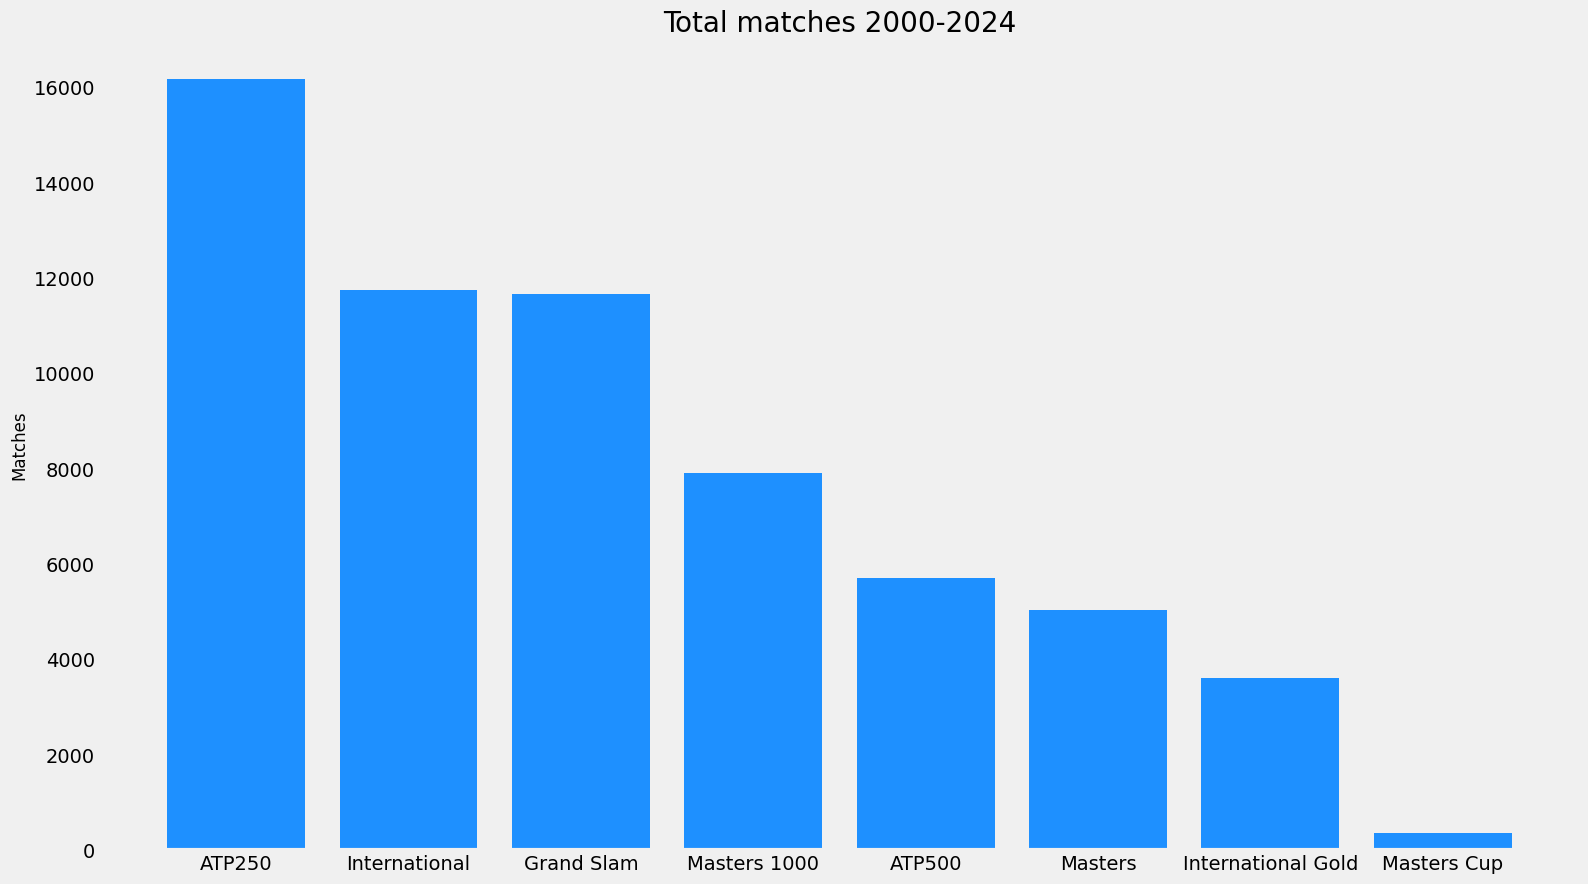

In [12]:
# now its time to visualise these tables ----- BAR CHART

plt.figure(figsize=(17,10))
plt.title('Total matches 2000-2024', fontsize=20)
plt.ylabel('Matches', fontsize=12)
plt.grid(False)
plt.bar(all_series.index, all_series.values, color='dodgerblue')
plt.show()

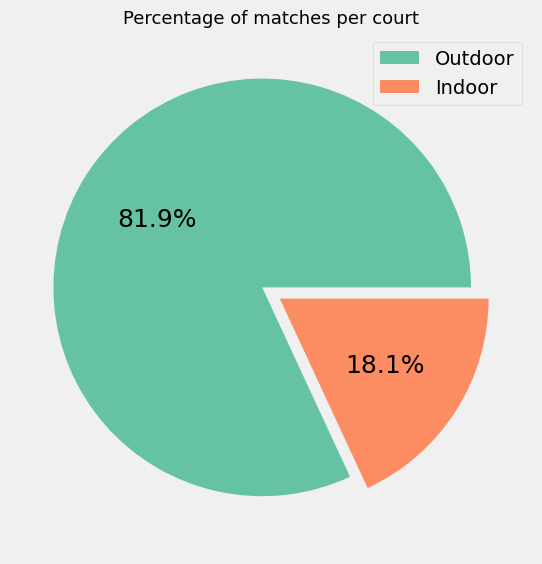

In [13]:
# matches played per court type ----- PIE CHART

plt.figure(figsize=(6,8))
plt.pie(all_courts.values, autopct='%1.1f%%', colors=sns.color_palette('Set2'), explode=[0.05, 0.05], textprops={'fontsize': 18})
plt.title('Percentage of matches per court', fontsize=13)
plt.legend(['Outdoor', 'Indoor'])
plt.show()

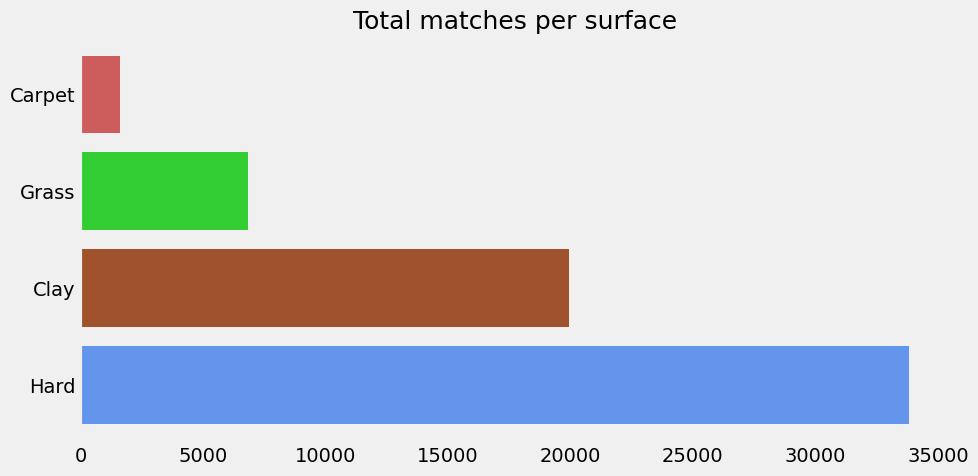

In [14]:
# matches per surface ----- HORIZONTAL BAR CHART

plt.figure(figsize=(10, 5))
plt.barh(all_surfaces.index, all_surfaces.values, color=['cornflowerblue', 'sienna', 'limegreen', 'indianred'])
plt.title('Total matches per surface', fontsize=18)
plt.grid(False)
plt.show()

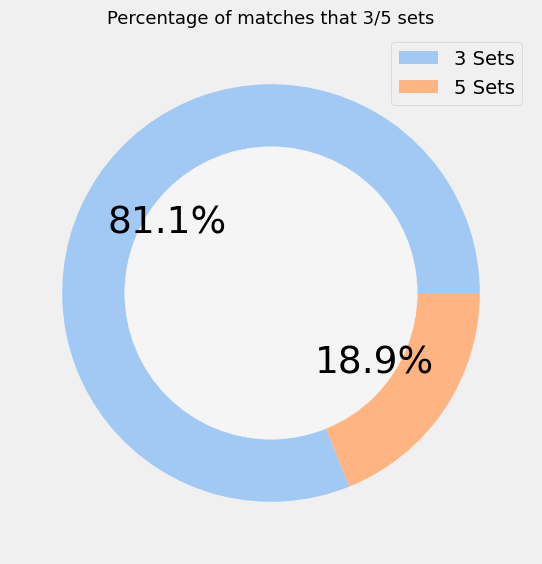

In [15]:
# what percentage of matches played are 3 sets or 5 sets ----- DONUT CHART

plt.figure(figsize=(6,8))
plt.pie(all_sets.values, autopct='%1.1f%%', colors=sns.color_palette('pastel'), textprops={'fontsize': 27})
plt.title('Percentage of matches that 3/5 sets', fontsize=13)
plt.legend(['3 Sets', '5 Sets'])
my_circle = plt.Circle( (0,0), 0.7, color='whitesmoke')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

-------------------------------------------------------------------------------------------------------------------

### Create a sub-dataset , that contains only Grand Slams data and explore

In [16]:
# create a subset called grand_slam

grand_slam = tennis_data[tennis_data['Series'] == 'Grand Slam']

In [17]:
# check shape

grand_slam.shape

(11669, 17)

In [18]:
# create a dataset that contains all the winners of grand slams from 2000 - 2024

grand_slam['Tournament'].value_counts()

Tournament
Australian Open    3039
French Open        2929
US Open            2883
Wimbledon          2818
Name: count, dtype: int64

In [19]:
# created a subset of grand slam data , but only of the final

gs_finals = grand_slam[grand_slam['Round'] == 'The Final']

In [20]:
gs_finals.head(10)

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
274,Australian Open,2000,Grand Slam,Outdoor,Hard,The Final,5,Agassi A.,Kafelnikov Y.,Agassi A.,1,2,-1,-1,-1.00000,-1.00000,3-6 6-3 6-2 6-4
1382,French Open,2000,Grand Slam,Outdoor,Clay,The Final,5,Kuerten G.,Norman M.,Kuerten G.,5,3,-1,-1,-1.00000,-1.00000,6-2 6-3 2-6 7-6
1649,Wimbledon,2000,Grand Slam,Outdoor,Grass,The Final,5,Rafter P.,Sampras P.,Sampras P.,21,3,-1,-1,-1.00000,-1.00000,7-6 6-7 4-6 2-6
2330,US Open,2000,Grand Slam,Outdoor,Hard,The Final,5,Safin M.,Sampras P.,Safin M.,7,4,-1,-1,-1.00000,-1.00000,6-4 6-3 6-3
3150,Australian Open,2001,Grand Slam,Outdoor,Hard,The Final,5,Agassi A.,Clement A.,Agassi A.,6,18,-1,-1,-1.00000,-1.00000,6-4 6-2 6-2
4283,French Open,2001,Grand Slam,Outdoor,Clay,The Final,5,Corretja A.,Kuerten G.,Kuerten G.,13,1,-1,-1,3.75000,1.22900,7-6 5-7 2-6 0-6
4550,Wimbledon,2001,Grand Slam,Outdoor,Grass,The Final,5,Ivanisevic G.,Rafter P.,Ivanisevic G.,125,10,-1,-1,2.31875,1.49575,6-3 3-6 6-3 2-6 9-7
5237,US Open,2001,Grand Slam,Outdoor,Hard,The Final,5,Sampras P.,Hewitt L.,Hewitt L.,10,4,-1,-1,1.37750,2.76250,6-7 1-6 1-6
6034,Australian Open,2002,Grand Slam,Outdoor,Hard,The Final,5,Johansson T.,Safin M.,Johansson T.,18,11,-1,-1,3.15000,1.30075,3-6 6-4 6-4 7-6
7077,French Open,2002,Grand Slam,Outdoor,Clay,The Final,5,Ferrero J.C.,Costa A.,Costa A.,11,22,-1,-1,1.32000,2.95000,1-6 0-6 6-4 3-6


In [21]:
# create a pivot table to have player names as rows and tournaments as columns 

gs_champs =  pd.pivot_table(gs_finals, index='Winner', columns='Tournament', aggfunc='size', fill_value=0)

In [22]:
# create a new column that stores the sum of all grand slam titles won

gs_champs['Total grand slams'] = gs_champs.sum(axis=1)

In [23]:
# get shape of this data

gs_champs.shape

(22, 5)

In [24]:
# dataset of all the champions sorted DESC

champs = gs_champs.sort_values(by='Total grand slams', ascending=False)

In [25]:
champs

Tournament,Australian Open,French Open,US Open,Wimbledon,Total grand slams
Winner,,,,,
Djokovic N.,10,3,4,7,24
Nadal R.,2,14,3,2,21
Federer R.,6,1,5,8,20
Agassi A.,3,0,0,0,3
Murray A.,0,0,1,2,3
Wawrinka S.,1,1,1,0,3
Hewitt L.,0,0,1,1,2
Alcaraz C.,0,0,1,1,2
Kuerten G.,0,2,0,0,2


In [26]:
top_six = champs.loc['Djokovic N.':'Wawrinka S.']

In [27]:
top_six = top_six.drop(['Total grand slams'], axis=1)

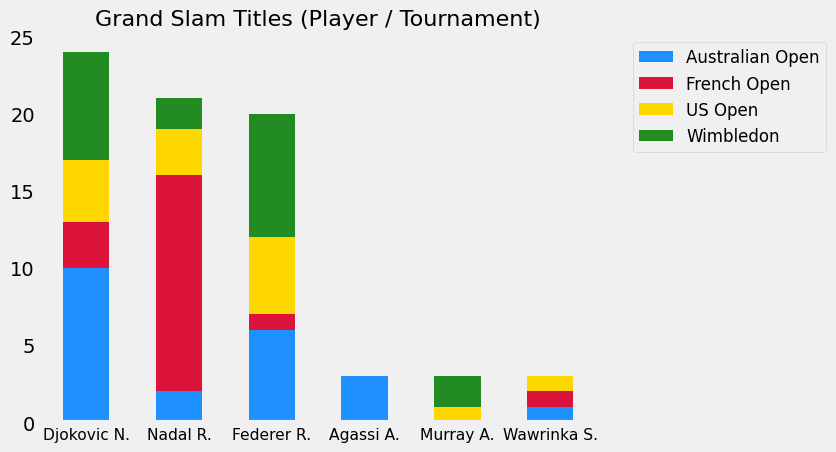

In [28]:
# grand slam titles of top 6 players by tournament --------- STACKED BAR CHART

top_six.plot(kind='bar', stacked=True, color=['dodgerblue','crimson','gold','forestgreen'])
plt.title('Grand Slam Titles (Player / Tournament)', fontsize=16)
plt.xlabel('')
plt.xticks(rotation=360, fontsize=11.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(False)
plt.show()

-------------------------------------------------------------------------------------------------------------------

## How many matches do players play each year (top 10)

In [29]:
# view the data tennis_data again

tennis_data.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


In [30]:
player_1 = tennis_data['Player_1'].value_counts()
player_2 = tennis_data['Player_2'].value_counts()
winner = (tennis_data['Winner'].value_counts()).sort_values(ascending=False)

In [31]:
# Combine the counts of each player from player_1 and player_2
total_counts_float = player_1.add(player_2, fill_value=0)

# Convert the result to an integer
total_counts_int = total_counts_float.astype(int)

In [32]:
most_matches_pl = total_counts_int.sort_values(ascending=False)[:10]

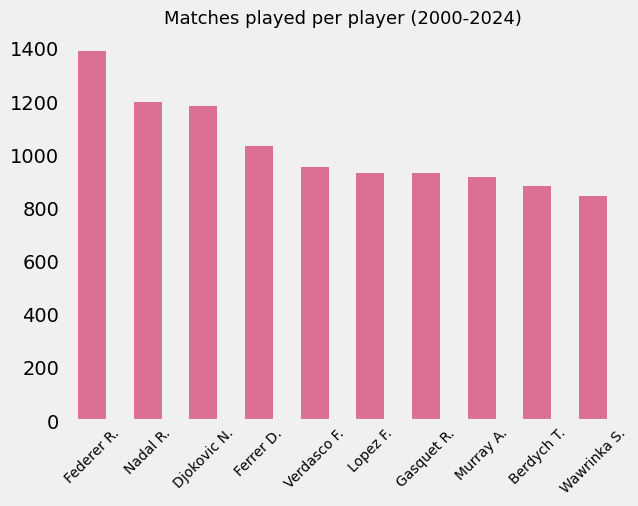

In [33]:
most_matches_pl.plot(kind='bar', color='palevioletred')
plt.grid(False)
plt.title('Matches played per player (2000-2024)', fontsize=13)
plt.xticks(rotation=45, ha='center', fontsize=10)
plt.show()

In [34]:
winner

Winner
Federer R.      1151
Djokovic N.      999
Nadal R.         998
Ferrer D.        677
Murray A.        667
                ... 
El Aarej M.        1
Ajdukovic D.       1
Erler A.           1
Quinn E.           1
Ram A.             1
Name: count, Length: 1109, dtype: int64

In [35]:
# calculate win percentage of each player 

win_percentage = winner.div(total_counts_int, fill_value=0)

In [36]:
win_perc = win_percentage * 100

In [37]:
win_perc = win_perc.round(2)

In [38]:
win_perc.sort_values(ascending=False)[3:13]

Djokovic N.      84.38
Nadal R.         83.17
Federer R.       82.63
Nargiso D.       80.00
Tsitsipas S.     80.00
Alcaraz C.       78.68
Agassi A.        76.26
Roddick A.       75.60
Djokovic N.      75.00
Davydenko N.     75.00
Name: count, dtype: float64

-------------------------------------------------------------------------------------------------------------------

## Player win by surface

In [39]:
# Player wins by surface

player_per_surface = pd.pivot_table(tennis_data, index='Winner', columns='Surface', aggfunc='size', fill_value=0)

In [40]:
player_per_surface['Total Matches Won'] = player_per_surface.sum(axis=1)

In [41]:
player_per_surface['Total Matches Played'] = total_counts_int

In [42]:
player_per_surface.sort_values(by='Total Matches Played', ascending=False)[:20]

Surface,Carpet,Clay,Grass,Hard,Total Matches Won,Total Matches Played
Winner,,,,,,
Federer R.,46,210,182,713,1151,1393
Nadal R.,7,446,75,470,998,1200
Djokovic N.,5,253,110,631,999,1184
Ferrer D.,9,300,40,328,677,1035
Verdasco F.,12,222,49,241,524,955
Lopez F.,13,121,83,254,471,933
Gasquet R.,12,156,73,327,568,931
Murray A.,18,97,104,448,667,917
Berdych T.,14,127,65,369,575,885


## Matches played at each surface

In [43]:
grass = tennis_data[tennis_data['Surface'] == 'Grass']

p1_grass = grass['Player_1'].value_counts()
p2_grass = grass['Player_2'].value_counts()

grass_count = p1_grass.add(p2_grass, fill_value=0)
grass_count_int = grass_count.astype(int)

grass_count_int.sort_values(ascending=False)[:10]

Federer R.      208
Lopez F.        133
Murray A.       132
Hewitt L.       130
Djokovic N.     125
Querrey S.      118
Karlovic I.     116
Gasquet R.      111
Mannarino A.    110
Mahut N.        107
Name: count, dtype: int64

In [44]:
clay = tennis_data[tennis_data['Surface'] == 'Clay']

p1_clay = clay['Player_1'].value_counts()
p2_clay = clay['Player_2'].value_counts()

clay_count = p1_clay.add(p2_clay, fill_value=0)
clay_count_int = clay_count.astype(int)

clay_count_int.sort_values(ascending=False)[:10]

Nadal R.       490
Ferrer D.      434
Almagro N.     393
Montanes A.    382
Fognini F.     378
Verdasco F.    376
Robredo T.     367
Monaco J.      332
Djokovic N.    310
Chela J.I.     296
Name: count, dtype: int64

In [45]:
hard = tennis_data[tennis_data['Surface'] == 'Hard']

p1_hard = hard['Player_1'].value_counts()
p2_hard = hard['Player_2'].value_counts()

hard_count = p1_hard.add(p2_hard, fill_value=0)
hard_count_int = hard_count.astype(int)

hard_count_int.sort_values(ascending=False)[:10]

Federer R.     853
Djokovic N.    738
Murray A.      618
Nadal R.       603
Berdych T.     564
Gasquet R.     545
Isner J.       537
Roddick A.     522
Lopez F.       519
Monfils G.     516
Name: count, dtype: int64

In [46]:
carpet = tennis_data[tennis_data['Surface'] == 'Carpet']

p1_carpet = carpet['Player_1'].value_counts()
p2_carpet = carpet['Player_2'].value_counts()

carpet_count = p1_carpet.add(p2_carpet, fill_value=0)
carpet_count_int = carpet_count.astype(int)

carpet_count_int.sort_values(ascending=False)[:10]

Ljubicic I.     69
Safin M.        62
Youzhny M.      59
Federer R.      59
Clement A.      54
Davydenko N.    53
Santoro F.      46
Mathieu P.H.    45
Mirnyi M.       45
Hrbaty D.       45
Name: count, dtype: int64

In [47]:
# add all the surface counts to player_per_surface table , one by one

In [48]:
player_per_surface['Grass_matches'] = grass_count_int

In [49]:
player_per_surface['Clay_matches'] = clay_count_int

In [50]:
player_per_surface['Hard_matches'] = hard_count_int

In [51]:
player_per_surface['Carpet_matches'] = carpet_count_int

In [52]:
columns_to_convert = ['Grass_matches', 'Clay_matches', 'Hard_matches', 'Carpet_matches']

# Replace non-finite values (NaN or inf) with zero
player_per_surface[columns_to_convert] = player_per_surface[columns_to_convert].fillna(0)

# Convert columns to integer data type
for column in columns_to_convert:
    player_per_surface[column] = player_per_surface[column].astype(int)

In [53]:
performance_surface = (player_per_surface.sort_values(by='Total Matches Played', ascending=False))[:20]

In [54]:
performance_surface

Surface,Carpet,Clay,Grass,Hard,Total Matches Won,Total Matches Played,Grass_matches,Clay_matches,Hard_matches,Carpet_matches
Winner,,,,,,,,,,
Federer R.,46,210,182,713,1151,1393,208,273,853,59
Nadal R.,7,446,75,470,998,1200,94,490,603,13
Djokovic N.,5,253,110,631,999,1184,125,310,738,11
Ferrer D.,9,300,40,328,677,1035,65,434,515,21
Verdasco F.,12,222,49,241,524,955,92,376,466,21
Lopez F.,13,121,83,254,471,933,133,252,519,29
Gasquet R.,12,156,73,327,568,931,111,257,545,18
Murray A.,18,97,104,448,667,917,132,143,618,24
Berdych T.,14,127,65,369,575,885,95,205,564,21


In [55]:
# rename columns 

performance_surface = performance_surface.rename(columns={'Carpet':'Carpet_won','Grass':'Grass_won','Hard':'Hard_won','Clay':'Clay_won','Total Matches Won':'Total_matches_won', 'Total Matches Played':'Total_matches_played'})

In [56]:
# Define the desired order of columns
desired_order = ['Carpet_matches', 'Carpet_won', 'Grass_matches', 'Grass_won', 'Clay_matches', 'Clay_won', 'Hard_matches', 'Hard_won', 'Total_matches_played', 'Total_matches_won']

# Reorder the columns
player_record = performance_surface.reindex(columns=desired_order)

In [57]:
player_record

Surface,Carpet_matches,Carpet_won,Grass_matches,Grass_won,Clay_matches,Clay_won,Hard_matches,Hard_won,Total_matches_played,Total_matches_won
Winner,,,,,,,,,,
Federer R.,59,46,208,182,273,210,853,713,1393,1151
Nadal R.,13,7,94,75,490,446,603,470,1200,998
Djokovic N.,11,5,125,110,310,253,738,631,1184,999
Ferrer D.,21,9,65,40,434,300,515,328,1035,677
Verdasco F.,21,12,92,49,376,222,466,241,955,524
Lopez F.,29,13,133,83,252,121,519,254,933,471
Gasquet R.,18,12,111,73,257,156,545,327,931,568
Murray A.,24,18,132,104,143,97,618,448,917,667
Berdych T.,21,14,95,65,205,127,564,369,885,575


-------------------------------------------------------------------------------------------------------------------

## Calculate player win % per surface

In [58]:
# Calculate win percentage for each surface
surfaces = ['Carpet', 'Grass', 'Clay', 'Hard']
percentage_matrix = pd.DataFrame()

for surface in surfaces:
    matches_col = f'{surface}_matches'
    won_col = f'{surface}_won'
    percentage_matrix[surface] = (player_record[won_col] / player_record[matches_col]) * 100

percentage_matrix.fillna(0, inplace=True)  # Replace NaN values with 0 (for cases where there are no matches played)

In [59]:
perc_by_surface = percentage_matrix.round(2)

In [60]:
perc_by_surface

,Carpet,Grass,Clay,Hard
Winner,,,,
Federer R.,77.97,87.50,76.92,83.59
Nadal R.,53.85,79.79,91.02,77.94
Djokovic N.,45.45,88.00,81.61,85.50
Ferrer D.,42.86,61.54,69.12,63.69
Verdasco F.,57.14,53.26,59.04,51.72
Lopez F.,44.83,62.41,48.02,48.94
Gasquet R.,66.67,65.77,60.70,60.00
Murray A.,75.00,78.79,67.83,72.49
Berdych T.,66.67,68.42,61.95,65.43


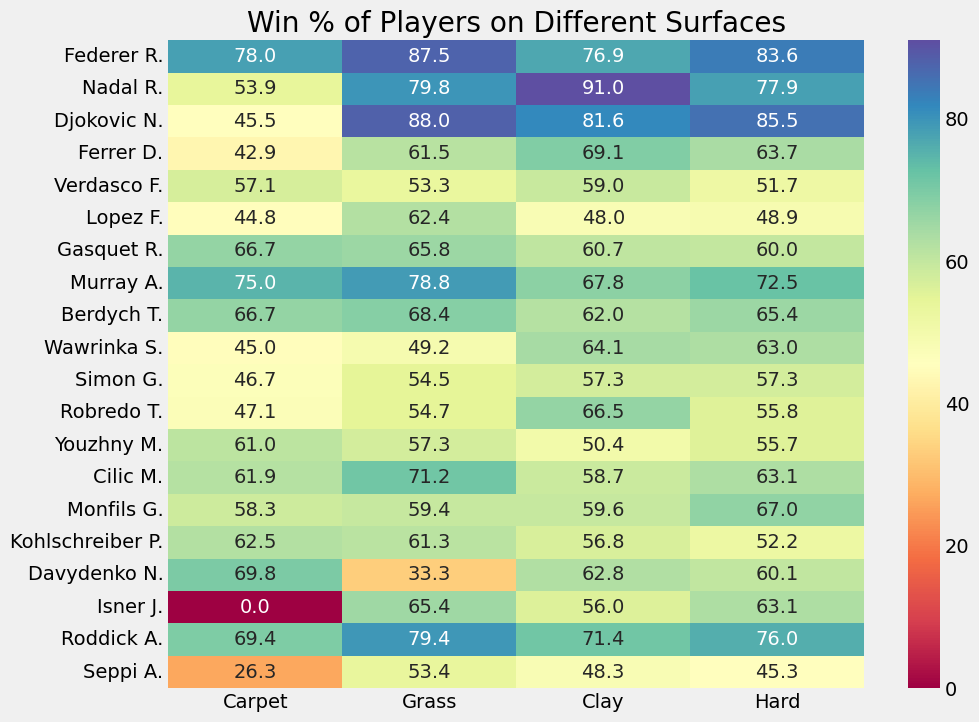

In [61]:
# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(perc_by_surface, cmap="Spectral", annot=True, fmt=".1f")

# Rotate the tick labels for better readability
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title('Win % of Players on Different Surfaces')
plt.ylabel('')
plt.show()

-------------------------------------------------------------------------------------------------------------------

### Matches played by year 

In [62]:
def matches_year(date_column=tennis_data['Date'], \
                 player_1_column=tennis_data['Player_1'], \
                 player_2_column=tennis_data['Player_2']):
    
    player_counts = {}
    
    # Iterate through each match
    for date, player_1, player_2 in zip(date_column, player_1_column, player_2_column):
       
        # Check player 1
        if (date, player_1) in player_counts:
            player_counts[(date, player_1)] += 1
        else:
            player_counts[(date, player_1)] = 1
        
        # Check player 2
        if (date, player_2) in player_counts:
            player_counts[(date, player_2)] += 1
        else:
            player_counts[(date, player_2)] = 1
    
    # Create DataFrame from player_counts dictionary
    
    df = pd.DataFrame(list(player_counts.items()), columns=['Date_Player', 'Num_Matches'])
    df[['Year', 'Player_Name']] = pd.DataFrame(df['Date_Player'].tolist(), index=df.index)
    df.drop(columns=['Date_Player'], inplace=True)
    
    return df

In [63]:
player_matches_year = matches_year()

In [64]:
player_matches_year.reindex(columns=['Year', 'Player_Name', 'Num_Matches'])

,Year,Player_Name,Num_Matches
0,2000,Dosedel S.,36
1,2000,Ljubicic I.,40
2,2000,Clement A.,56
3,2000,Enqvist T.,71
4,2000,Escude N.,47
...,...,...,...
7716,2024,Nakashima B.,2
7717,2024,Rodionov J.,1
7718,2024,Hong S.,1
7719,2024,Fognini F.,2


In [65]:
matches_played_player_year = player_matches_year.sort_values(by='Num_Matches', ascending=False)

In [66]:
matches_played_player_year

,Num_Matches,Year,Player_Name
2122,94,2006,Federer R.
1020,92,2003,Schuettler R.
416,91,2001,Kafelnikov Y.
118,90,2000,Safin M.
3077,88,2009,Djokovic N.
...,...,...,...
4603,1,2013,Westerhof B.
4604,1,2013,Topic J.
4605,1,2013,Coric B.
4607,1,2013,Setkic A.


In [67]:
# Filter the DataFrame for matches played by Federer
federer_matches = matches_played_player_year[matches_played_player_year['Player_Name'] == 'Federer R.']

# Sort the matches by year
federer = federer_matches.sort_values(by='Year')

In [68]:
# Filter the DataFrame for matches played by Nadal
nadal_matches = matches_played_player_year[matches_played_player_year['Player_Name'] == 'Nadal R.']

# Sort the matches by year
nadal = nadal_matches.sort_values(by='Year')

In [69]:
# Filter the DataFrame for matches played by Djokovic
djokovic_matches = matches_played_player_year[matches_played_player_year['Player_Name'] == 'Djokovic N.']

# Sort the matches by year
djokovic = djokovic_matches.sort_values(by='Year')

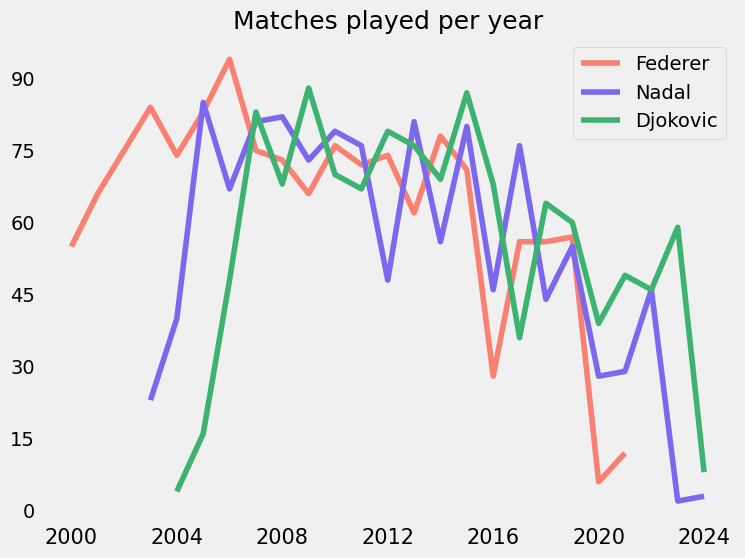

In [70]:
plt.figure(figsize=(8,6))
plt.plot(federer['Year'], federer['Num_Matches'], color='salmon')
plt.plot(nadal['Year'], nadal['Num_Matches'], color='mediumslateblue')
plt.plot(djokovic['Year'], djokovic['Num_Matches'], color='mediumseagreen')
plt.title('Matches played per year', fontsize=18)
plt.legend(['Federer', 'Nadal', 'Djokovic'])
plt.xticks(['2000', '2004', '2008', '2012', '2016', '2020', '2024'], fontsize=15)
plt.yticks(range(0, 105, 15))
plt.grid(False)
plt.show()